In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#Abrir librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Configuración general para lectura y limpieza
CFG = {
    "path": "C:/Users/bruno/Desktop/PROYECTO ULTIMO/EndInvFINAL12312016.csv",   # ruta a tu archivo
    "sep": ",",                     # separador CSV
    "encoding": "utf-8",
    "na_like": ["", "NA", "N/A", "-", "null", "None"]}

In [6]:
#importar archivo y configuro el archivo 
final_de_inventario="C:/Users/bruno/Desktop/PROYECTO ULTIMO/EndInvFINAL12312016.csv", #ruta del archivo
                  
                    

In [7]:

#aplico la configuracion a mi archivo
df_final_de_inventario=pd.read_csv(
                         CFG["path"],
                         sep=CFG["sep"],
                         encoding=CFG["encoding"],
                         na_values=CFG["na_like"]
) #leer archivo

In [8]:
df_final_de_inventario.shape#analizar la cantidad de filas y columnas

(224489, 9)

In [9]:
# Muestra información general de columnas, tipos de datos y nulos
df_final_de_inventario.info() 

# Vista rápida de las primeras filas
df_final_de_inventario.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [10]:
# Estadísticas numéricas básicas; solo muestras las columnas numericas
df_final_de_inventario.describe()

,Store,Brand,onHand,Price
count,224489.000000,224489.000000,224489.000000,224489.000000
mean,43.505740,14356.370513,21.763988,23.585583
std,23.326415,13118.467851,37.233576,79.202775
min,1.000000,58.000000,0.000000,0.490000
25%,23.000000,3798.000000,7.000000,9.990000
50%,44.000000,8259.000000,12.000000,14.990000
75%,66.000000,23965.000000,22.000000,23.490000
max,81.000000,90631.000000,3676.000000,13999.900000


In [11]:
# Conteo de valores nulos por columna
df_final_de_inventario.isna().sum()

InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

In [12]:
#realizar copia 
df_final_de_inventario2=df_final_de_inventario.copy()

In [13]:
#eliminar datos nulos 
df_final_de_inventario2 = df_final_de_inventario2.dropna(subset=["City"], how="all")


In [14]:
df_final_de_inventario2.isna().sum() #VERIFICO DATOS NUELOS.

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
endDate        0
dtype: int64

In [15]:
df_final_de_inventario2.info() #Se corrobora que las filas tiene la misma cantidad de registros

<class 'pandas.core.frame.DataFrame'>
Index: 223205 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  223205 non-null  object 
 1   Store        223205 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        223205 non-null  int64  
 4   Description  223205 non-null  object 
 5   Size         223205 non-null  object 
 6   onHand       223205 non-null  int64  
 7   Price        223205 non-null  float64
 8   endDate      223205 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 17.0+ MB


In [16]:
print(df_final_de_inventario2.columns.tolist())

['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']


In [17]:
# 2️⃣ Renombrar todas las columnas a formato snake_case
df_final_de_inventario2.columns = (
    df_final_de_inventario2.columns
      .str.strip()                                     # elimina espacios al principio/fin
      .str.lower()                                    # convierte a minúsculas
      .str.normalize('NFKD')                          # quita tildes
      .str.encode('ascii', errors='ignore')           # quita caracteres especiales
      .str.decode('utf-8')
      .str.replace(r'\s+', '_', regex=True)           # reemplaza espacios por "_"
      .str.replace(r'[^a-z0-9_]', '', regex=True)     # elimina caracteres raros
)
# 3️⃣ Convertir columnas de texto a string (más seguro que object)
cols_texto = ["inventoryid", "city","description","size"]
for col in cols_texto:
    if col in df_final_de_inventario2.columns:
        df_final_de_inventario2[col] = df_final_de_inventario2[col].astype("string").str.strip()

# 4️⃣ Convertir esas columnas al tipo datetime (día/mes/año)
df_final_de_inventario2["enddate"]= pd.to_datetime(df_final_de_inventario2["enddate"], errors='coerce', dayfirst=True)

# 5️⃣ (Opcional) Mostrar resultados
print("✅ Columnas convertidas a snake_case:")
print(df_final_de_inventario2.columns.to_list())

print("\n✅ Columnas de fecha convertidas al formato datetime:")
print(df_final_de_inventario2["enddate"].head())




✅ Columnas convertidas a snake_case:
['inventoryid', 'store', 'city', 'brand', 'description', 'size', 'onhand', 'price', 'enddate']

✅ Columnas de fecha convertidas al formato datetime:
0   2016-12-31
1   2016-12-31
2   2016-12-31
3   2016-12-31
4   2016-12-31
Name: enddate, dtype: datetime64[ns]


C:\Users\bruno\AppData\Local\Temp\ipykernel_23260\1605461279.py:19: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_final_de_inventario2["enddate"]= pd.to_datetime(df_final_de_inventario2["enddate"], errors='coerce', dayfirst=True)


In [18]:
df_final_de_inventario2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223205 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   inventoryid  223205 non-null  string        
 1   store        223205 non-null  int64         
 2   city         223205 non-null  string        
 3   brand        223205 non-null  int64         
 4   description  223205 non-null  string        
 5   size         223205 non-null  string        
 6   onhand       223205 non-null  int64         
 7   price        223205 non-null  float64       
 8   enddate      223205 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), string(4)
memory usage: 17.0 MB


In [19]:

# Crear copia completa del DataFrame
df_correccion_militros = df_final_de_inventario2.copy()

def correccion_mililitros(valor):
    if pd.isna(valor):
        return np.nan

    v = str(valor).lower().replace(',', '.').strip()

    # 1️⃣ Extraer primer número
    numeros = [float(x) for x in ''.join(ch if ch.isdigit() or ch == '.' or ch == ' ' else ' ' for ch in v).split()]
    base = numeros[0] if numeros else np.nan

    # 2️⃣ Detección de unidades
    if 'ml' in v:
        base = base
    elif any(p in v for p in ['Liter', 'liters', 'litro', 'litros', 'lt', ' l']):
        # Cualquier tipo de “liter” → 1000 mL
        base = 1000
    elif any(p in v for p in ['oz', 'onza', 'ounce', 'ounces']):
        base = base * 29.5735  # conversión onzas → mL
    else:
        base = base  # si no hay unidad, deja el número como está

    # 3️⃣ Detectar si menciona pack (pk, pack, /, +)
    if any(p in v for p in ['pk', 'pack', '/', '+']):
        return round(base, 2)

    # 4️⃣ Resultado final
    return round(base, 2)

# 🧩 Aplicar la función a la columna size
df_correccion_militros["size_original"] = df_correccion_militros["size"]
df_correccion_militros["size"] = df_correccion_militros["size_original"].apply(correccion_mililitros)
df_correccion_militros["size"] = pd.to_numeric(df_correccion_militros["size"], errors="coerce")

print("✅ Columna 'size' convertida correctamente a mililitros:")
print(df_correccion_militros[["size_original", "size"]].head(50))




✅ Columna 'size' convertida correctamente a mililitros:
   size_original    size
0          750mL  750.00
1          750mL  750.00
2          750mL  750.00
3          750mL  750.00
4          750mL  750.00
5          750mL  750.00
6          750mL  750.00
7          Liter     NaN
8          Liter     NaN
9     750mL + 2/  750.00
10         1.75L    1.75
11         750mL  750.00
12         750mL  750.00
13         750mL  750.00
14         750mL  750.00
15         750mL  750.00
16         750mL  750.00
17         Liter     NaN
18         Liter     NaN
19         750mL  750.00
20         1.75L    1.75
21         750mL  750.00
22         750mL  750.00
23         750mL  750.00
24         Liter     NaN
25         Liter     NaN
26         750mL  750.00
27         750mL  750.00
28         750mL  750.00
29         750mL  750.00
30         Liter     NaN
31         750mL  750.00
32         750mL  750.00
33         Liter     NaN
34         750mL  750.00
35         Liter     NaN
36         Liter   

In [20]:
# Crear nueva columna en el DataFrame original
df_final_de_inventario2["size_ml"] = df_final_de_inventario2["size"].apply(correccion_mililitros)

# Asegurarte de que el tipo sea numérico
df_final_de_inventario2["size_ml"] = pd.to_numeric(df_final_de_inventario2["size_ml"], errors="coerce")

print(" Columna 'size_ml' agregada correctamente al DataFrame:")
print(df_final_de_inventario2[["size", "size_ml"]].head(10))


 Columna 'size_ml' agregada correctamente al DataFrame:
         size  size_ml
0       750mL    750.0
1       750mL    750.0
2       750mL    750.0
3       750mL    750.0
4       750mL    750.0
5       750mL    750.0
6       750mL    750.0
7       Liter      NaN
8       Liter      NaN
9  750mL + 2/    750.0


In [21]:
print(df_final_de_inventario2.columns)

Index(['inventoryid', 'store', 'city', 'brand', 'description', 'size',
       'onhand', 'price', 'enddate', 'size_ml'],
      dtype='object')


In [22]:
#Eliminar filas repetidas
print (f"Tamaño del set antes de eliminar las filas repetidas: {df_final_de_inventario2.shape}")
df_final_de_inventario2.drop_duplicates(inplace=True)
print(f"Tamañño del set despues de elimminar las filas repetidas: {df_final_de_inventario2.shape}")

Tamaño del set antes de eliminar las filas repetidas: (223205, 10)
Tamañño del set despues de elimminar las filas repetidas: (223205, 10)


In [23]:
def limpiar_decimales(columna):
    s = columna.astype(str).str.strip()
    
    # Detectar si la mayoría usa coma como separador decimal
    muestra = s.sample(min(200, len(s)))  # revisar hasta 200 filas
    usa_coma_decimal = muestra.str.count(',').sum() > muestra.str.count('\.').sum()

    # Detectar sufijos 'k' (mil)
    tiene_k = s.str.contains('k', na=False)
     # Limpieza según formato decimal
    if usa_coma_decimal:
        # Quita puntos de miles y cambia coma por punto decimal
        s = s.str.replace('.', '', regex=False)
        s = s.str.replace(',', '.', regex=False)
    else:
        # Quita comas de miles
        s = s.str.replace(',', '', regex=False)
    
    # Convierte a número y redondea a 2 decimales
    return pd.to_numeric(s, errors='coerce').round(2)


<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
C:\Users\bruno\AppData\Local\Temp\ipykernel_23260\3383538492.py:6: SyntaxWarning: invalid escape sequence '\.'
  usa_coma_decimal = muestra.str.count(',').sum() > muestra.str.count('\.').sum()


In [24]:
df_final_de_inventario2['price'] = limpiar_decimales(df_final_de_inventario2['price'])
df_final_de_inventario2['onhand'] = limpiar_decimales(df_final_de_inventario2['onhand'])
df_final_de_inventario2['brand'] = limpiar_decimales(df_final_de_inventario2['brand'])


In [25]:
df_final_de_inventario2[['price', 'onhand', 'brand']].head()
print(df_final_de_inventario2.dtypes)


inventoryid    string[python]
store                   int64
city           string[python]
brand                   int64
description    string[python]
size           string[python]
onhand                  int64
price                 float64
enddate        datetime64[ns]
size_ml               float64
dtype: object


In [26]:
df_final_de_inventario2.describe()

,store,brand,onhand,price,enddate,size_ml
count,223205.000000,223205.000000,223205.000000,223205.000000,223205,219472.000000
mean,43.491391,14368.633736,21.889187,23.616610,2016-12-31 00:00:00,559.203549
min,1.000000,58.000000,0.000000,0.490000,2016-12-31 00:00:00,1.500000
25%,23.000000,3799.000000,7.000000,9.990000,2016-12-31 00:00:00,375.000000
50%,44.000000,8264.000000,12.000000,14.990000,2016-12-31 00:00:00,750.000000
75%,66.000000,23974.000000,22.000000,23.990000,2016-12-31 00:00:00,750.000000
max,81.000000,90631.000000,3676.000000,13999.900000,2016-12-31 00:00:00,750.000000
std,23.392643,13119.090024,37.303803,79.422296,NaN,312.839183


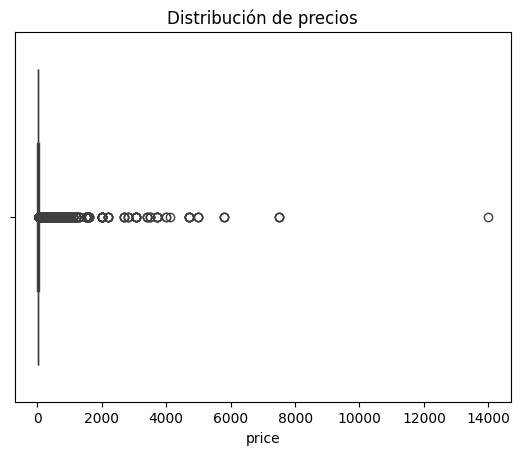

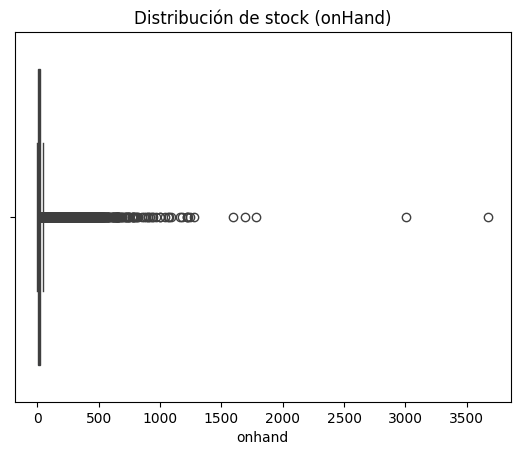

In [27]:
#Realizar grafico para ver valores extremos

sns.boxplot(x=df_final_de_inventario2['price'])
plt.title('Distribución de precios')
plt.show()

sns.boxplot(x=df_final_de_inventario2['onhand'])
plt.title('Distribución de stock (onHand)')
plt.show()


In [28]:
Q1 = df_final_de_inventario2['price'].quantile(0.25)
Q3 = df_final_de_inventario2['price'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

df_winsor = df_final_de_inventario2.copy()
df_winsor['price'] = np.where(
    df_winsor['price'] > lim_sup, lim_sup,
    np.where(df_winsor['price'] < lim_inf, lim_inf, df_winsor['price']))

print(f"Filas originales: {len(df_final_de_inventario2)}")
print(f"Filas después del filtrado: {len(df_winsor)}")
print(f"Límites usados: {lim_inf:.2f} a {lim_sup:.2f}")


Filas originales: 223205
Filas después del filtrado: 223205
Límites usados: -11.01 a 44.99


In [29]:
Q1 = df_final_de_inventario2['onhand'].quantile(0.25)
Q3 = df_final_de_inventario2['onhand'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

df_winsor['onhand'] = np.where(
    df_winsor['onhand'] > lim_sup, lim_sup,
    np.where(df_winsor['onhand'] < lim_inf, lim_inf, df_winsor['onhand']))

print(f"Filas originales: {len(df_final_de_inventario2)}")
print(f"Filas después del filtrado: {len(df_winsor)}")
print(f"Límites usados: {lim_inf:.2f} a {lim_sup:.2f}")

Filas originales: 223205
Filas después del filtrado: 223205
Límites usados: -15.50 a 44.50


In [30]:
print("\n📊 Estadísticas ANTES:")
print(df_final_de_inventario2[["price","onhand"]].describe())

print("\n📊 Estadísticas DESPUÉS (winsorizado):")
print(df_winsor[["price", "onhand"]].describe())


📊 Estadísticas ANTES:
               price         onhand
count  223205.000000  223205.000000
mean       23.616610      21.889187
std        79.422296      37.303803
min         0.490000       0.000000
25%         9.990000       7.000000
50%        14.990000      12.000000
75%        23.990000      22.000000
max     13999.900000    3676.000000

📊 Estadísticas DESPUÉS (winsorizado):
               price         onhand
count  223205.000000  223205.000000
mean       18.455982      16.451280
std        11.925975      13.153494
min         0.490000       0.000000
25%         9.990000       7.000000
50%        14.990000      12.000000
75%        23.990000      22.000000
max        44.990000      44.500000


In [31]:
# Exportar el DataFrame limpio (sin índices)
df_final_de_inventario2.to_csv("datos_limpios.csv", index=False,sep=",", encoding='utf-8')

print("✅ Archivo 'datos_limpios.csv' guardado correctamente en la carpeta del proyecto.")

✅ Archivo 'datos_limpios.csv' guardado correctamente en la carpeta del proyecto.
